# Jala Business Intelligence Test Case

*Abyanandi Zaintama*

**Context**

eShrimp adalah sebuah startup yang bergerak dibidang teknologi budidaya udang vannamei. Startup ini didirikan bertujuan untuk membantu petambak dalam berbudidaya udang. eShrimp membuat webapp bernama eCultivation yang membantu petambak untuk:

- Memanage budidaya udang/ Farm Management System (FMS)
- Mengakses harga udang
- Mengakses informasi berita/informasi terkait budidaya udang vannamei (Shrimp Magazine)
- Mengakses informasi terkait penyakit udang

Untuk mencapai tujuan tersebut, eCultivation memiliki dua fitur utama, yaitu Farm Management System (FMS) dan Portal Informasi. 

**Problem**

Saat ini eShrimp mengalami masalah dalam hal Human Resource. Di bagian tim product development, eShrimp tidak memiliki SDM yang cukup untuk memaintain seluruh product yang ada. Selain itu, tim sales and marketing juga kekurangan SDM untuk melakukan aktivitas sales, yaitu sales call dan live demo produk.

Dari permasalahan itu, sebagai Business Intelligence anda diminta untuk memberikan insight mengenai apa yang perlu dilakukan untuk mengoptimalkan jumlah siklus pro yang teraktivasi oleh masing-masing tambak. Anda dapat menggunakan data yang disediakan di

| Variables                        | Type | Keterangan                                                                                                                                                                                             |
| -------------------------------- | ---- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| farm_id                          | INT  | ID Tambak                                                                                                                                                                                              |
| registered_since                 | date | tanggal registrasi di eCultivation                                                                                                                                                                     |
| account_age                      | INT  | Umur akun tambak di eCultivation                                                                                                                                                                       |
| fms_access                       | INT  | Rerata penggunaan dalam satu minggu platform management budidaya dalam 4 bulan terakhir yang mencakup:<br><br>- View Data (Table and analytics)<br>- Create Data (Feed, Sampling, Kualitas Air, Panen) |
| shrimp_price_access              | INT  | Rerata visit fitur harga udang dalam satu minggu dalam 4 bulan terakhir                                                                                                                                |
| shrimp_news_access               | INT  | Rerata visit fitur shrimp magazine dalam satu minggu dalam 4 bulan terakhir                                                                                                                            |
| shrimp_diseaseInformation_access | INT  | Rerata visit fitur shrimp disease information dalam satu minggu dalam 4 bulan terakhir                                                                                                                 |
| registered_ponds                 | INT  | Jumlah kolam yang terdaftar di tambak tersebut                                                                                                                                                         |
| live_demo                        | Bool | Apakah user pernah diberikan live demo tentang produk atau tidak:<br>1: Pernah<br>0: Tidak Pernah                                                                                                      |
| followedup_call                  | Bool | Apakah user pernah menjadi target sales-call atau tidak:<br>1: Pernah<br>0: Tidak Pernah                                                                                                               |
| Finished_premium                 | INT  | Jumlah siklus premium yang pernah diselesaikan oleh suatu tambak                                                                                                                                       |
| Finished_basic                   | INT  | Jumlah siklus basic yang pernah diselesaikan oleh suatu tambak                                                                                                                                         |
| ongoing_premium                  | INT  | Jumlah siklus premium yang saat ini sedang berjalan di suatu tambak                                                                                                                                    |
| ongoing_basic                    | INT  | Jumlah siklus basic yang saat ini sedang berjalan di suatu tambak                                                                                                                                      |


# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/Users/zaintama/Documents/Hacktiv8/JALA_Abyanandi/Data.csv')
df.head()

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,registered_since,farm_id
0,26.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,12.0,4.0,3.0,0.0,2021-09-30,1
1,24.0,102.0,12.0,2.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,4.0,2021-06-20,2
2,22.0,154.0,10.0,2.0,1.0,8.0,0.0,0.0,12.0,5.0,2.0,4.0,2021-04-29,3
3,0.0,147.0,7.0,1.0,1.0,11.0,0.0,0.0,12.0,5.0,0.0,0.0,2021-05-06,4
4,67.0,66.0,1.0,5.0,0.0,6.0,0.0,0.0,14.0,0.0,5.0,1.0,2021-07-26,5


In [3]:
df.drop(['registered_since'], axis=1, inplace=True)
df.head()

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
0,26.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,12.0,4.0,3.0,0.0,1
1,24.0,102.0,12.0,2.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,4.0,2
2,22.0,154.0,10.0,2.0,1.0,8.0,0.0,0.0,12.0,5.0,2.0,4.0,3
3,0.0,147.0,7.0,1.0,1.0,11.0,0.0,0.0,12.0,5.0,0.0,0.0,4
4,67.0,66.0,1.0,5.0,0.0,6.0,0.0,0.0,14.0,0.0,5.0,1.0,5


In [4]:
df.sort_values(['ongoing_pro_','finished_pro'], ascending=[False,True])

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
63832,155.0,76.0,0.0,0.0,2.0,13.0,1.0,0.0,41.0,14.0,35.0,19.0,63833
19505,106.0,106.0,1.0,7.0,4.0,19.0,1.0,0.0,40.0,27.0,34.0,21.0,19506
47760,106.0,131.0,3.0,0.0,4.0,8.0,1.0,0.0,41.0,19.0,34.0,21.0,47761
65140,103.0,69.0,0.0,0.0,3.0,28.0,1.0,0.0,43.0,24.0,33.0,16.0,65141
23854,138.0,156.0,12.0,5.0,3.0,13.0,0.0,0.0,37.0,18.0,32.0,21.0,23855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95529,6.0,196.0,10.0,4.0,0.0,35.0,0.0,0.0,18.0,8.0,0.0,0.0,95530
50460,0.0,281.0,8.0,3.0,0.0,23.0,0.0,0.0,19.0,4.0,0.0,2.0,50461
65342,8.0,250.0,3.0,3.0,0.0,34.0,0.0,0.0,19.0,9.0,0.0,1.0,65343
10634,0.0,252.0,13.0,2.0,0.0,24.0,1.0,0.0,20.0,1.0,0.0,0.0,10635


In [5]:
df.sort_values(["ongoing_pro_"], ascending = [True],inplace=True)

In [6]:
df.sort_values(['finished_pro'],ascending=False)

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
12056,91.0,228.0,10.0,4.0,1.0,29.0,1.0,0.0,43.0,20.0,29.0,17.0,12057
7084,91.0,222.0,14.0,1.0,1.0,16.0,1.0,0.0,43.0,12.0,30.0,17.0,7085
65140,103.0,69.0,0.0,0.0,3.0,28.0,1.0,0.0,43.0,24.0,33.0,16.0,65141
30601,70.0,165.0,12.0,4.0,2.0,34.0,1.0,0.0,42.0,22.0,27.0,14.0,30602
21006,72.0,311.0,4.0,9.0,3.0,22.0,1.0,0.0,41.0,23.0,28.0,21.0,21007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41887,0.0,5.0,8.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,41888
29992,0.0,28.0,10.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29993
19347,4.0,41.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19348
87354,0.0,8.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,87355


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 99999 to 63832
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fms_access                        100000 non-null  float64
 1   account_age                       100000 non-null  float64
 2   shrimp_price_access               100000 non-null  float64
 3   shrimp_news_access                100000 non-null  float64
 4   shrimp_diseaseInformation_access  100000 non-null  float64
 5   registered_ponds                  100000 non-null  float64
 6   live_demo_                        100000 non-null  float64
 7   followedup_call_                  100000 non-null  float64
 8   finished_pro                      100000 non-null  float64
 9   finished_free                     100000 non-null  float64
 10  ongoing_pro_                      100000 non-null  float64
 11  ongoing_free_                     100000 non-null

# EDA

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,100000.0,32.47931,26.037278,0.0,10.00,30.0,50.00,157.0
account_age,100000.0,86.63274,69.364541,0.0,26.00,80.0,134.00,438.0
shrimp_price_access,100000.0,5.41530,4.341204,0.0,2.00,5.0,8.00,26.0
shrimp_news_access,100000.0,3.24474,2.615586,0.0,1.00,3.0,5.00,16.0
shrimp_diseaseInformation_access,100000.0,1.07307,0.918324,0.0,0.00,1.0,2.00,5.0
registered_ponds,100000.0,10.83574,8.667053,0.0,3.00,10.0,17.00,52.0
live_demo_,100000.0,0.06756,0.250991,0.0,0.00,0.0,0.00,1.0
followedup_call_,100000.0,0.00979,0.098459,0.0,0.00,0.0,0.00,1.0
finished_pro,100000.0,14.05971,6.864583,0.0,9.00,14.0,19.00,43.0
finished_free,100000.0,5.23707,5.348276,0.0,0.00,4.0,9.00,34.0


In [9]:
df['account_age'].describe()

count    100000.000000
mean         86.632740
std          69.364541
min           0.000000
25%          26.000000
50%          80.000000
75%         134.000000
max         438.000000
Name: account_age, dtype: float64

<AxesSubplot:xlabel='account_age', ylabel='Count'>

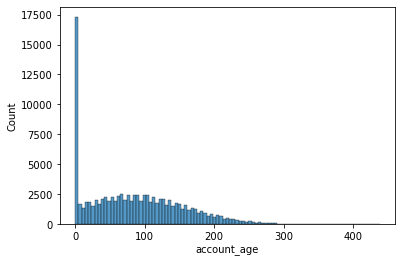

In [10]:
sns.histplot(df['account_age'])

In [11]:
new_account_count = df[df['account_age']==0]['farm_id'].count()/len(df)*100
print('Percentage of new account is {}%'.format(new_account_count))
print(df[df['account_age']==0]['farm_id'].count())

Percentage of new account is 16.05%
16050


In [12]:
new_account = df[df['account_age']==0]
new_account

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
66062,0.0,0.0,0.0,4.0,0.0,13.0,0.0,0.0,6.0,0.0,0.0,0.0,66063
66064,29.0,0.0,9.0,0.0,0.0,6.0,0.0,0.0,8.0,0.0,0.0,0.0,66065
27138,0.0,0.0,10.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27139
66090,21.0,0.0,11.0,2.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,66091
66094,27.0,0.0,14.0,3.0,1.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,66095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31739,67.0,0.0,0.0,7.0,5.0,24.0,1.0,0.0,37.0,29.0,29.0,15.0,31740
37898,106.0,0.0,0.0,2.0,2.0,24.0,1.0,0.0,36.0,19.0,29.0,13.0,37899
68699,133.0,0.0,0.0,1.0,3.0,8.0,0.0,0.0,31.0,15.0,29.0,16.0,68700
14772,97.0,0.0,5.0,2.0,3.0,25.0,1.0,0.0,39.0,22.0,31.0,13.0,14773


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,100000.0,32.47931,26.037278,0.0,10.00,30.0,50.00,157.0
account_age,100000.0,86.63274,69.364541,0.0,26.00,80.0,134.00,438.0
shrimp_price_access,100000.0,5.41530,4.341204,0.0,2.00,5.0,8.00,26.0
shrimp_news_access,100000.0,3.24474,2.615586,0.0,1.00,3.0,5.00,16.0
shrimp_diseaseInformation_access,100000.0,1.07307,0.918324,0.0,0.00,1.0,2.00,5.0
registered_ponds,100000.0,10.83574,8.667053,0.0,3.00,10.0,17.00,52.0
live_demo_,100000.0,0.06756,0.250991,0.0,0.00,0.0,0.00,1.0
followedup_call_,100000.0,0.00979,0.098459,0.0,0.00,0.0,0.00,1.0
finished_pro,100000.0,14.05971,6.864583,0.0,9.00,14.0,19.00,43.0
finished_free,100000.0,5.23707,5.348276,0.0,0.00,4.0,9.00,34.0


In [94]:
len(df[ (df['account_age'] >= 0)  & (df['account_age'] < 26) ])/len(df)

0.24804

In [98]:
len(df[ (df['account_age'] >= 26)  & (df['account_age'] < 80) ])/len(df)

0.25001

In [97]:
len(df[ (df['account_age'] >= 80)  & (df['account_age'] < 134) ])/len(df)

0.24965

In [96]:
len(df[ (df['account_age'] >= 134)  & (df['account_age'] <= 438) ])/len(df)

0.2523

# By Account Age

In [14]:
age_above_avg = df[df['account_age'] > df['account_age'].mean()]

In [108]:
age_below_avg = df[df['account_age'] < df['account_age'].mean()]

In [15]:
age_above_avg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,46759.0,32.381210,25.974580,0.0,10.0,30.0,50.0,147.0
account_age,46759.0,148.005261,47.167106,87.0,111.0,138.0,175.0,438.0
shrimp_price_access,46759.0,5.411450,4.323258,0.0,2.0,5.0,8.0,26.0
shrimp_news_access,46759.0,3.256528,2.617894,0.0,1.0,3.0,5.0,15.0
shrimp_diseaseInformation_access,46759.0,1.071259,0.917143,0.0,0.0,1.0,2.0,5.0
registered_ponds,46759.0,10.858744,8.674516,0.0,3.0,10.0,17.0,50.0
live_demo_,46759.0,0.066982,0.249993,0.0,0.0,0.0,0.0,1.0
followedup_call_,46759.0,0.010372,0.101316,0.0,0.0,0.0,0.0,1.0
finished_pro,46759.0,15.596698,6.767102,0.0,11.0,16.0,20.0,43.0
finished_free,46759.0,5.760132,5.533128,0.0,0.0,5.0,9.0,34.0


In [110]:
age_above_avg.describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,46759.0,32.381210,25.974580,0.0,10.0,30.0,50.0,147.0
account_age,46759.0,148.005261,47.167106,87.0,111.0,138.0,175.0,438.0
shrimp_price_access,46759.0,5.411450,4.323258,0.0,2.0,5.0,8.0,26.0
shrimp_news_access,46759.0,3.256528,2.617894,0.0,1.0,3.0,5.0,15.0
shrimp_diseaseInformation_access,46759.0,1.071259,0.917143,0.0,0.0,1.0,2.0,5.0
registered_ponds,46759.0,10.858744,8.674516,0.0,3.0,10.0,17.0,50.0
live_demo_,46759.0,0.066982,0.249993,0.0,0.0,0.0,0.0,1.0
followedup_call_,46759.0,0.010372,0.101316,0.0,0.0,0.0,0.0,1.0
finished_pro,46759.0,15.596698,6.767102,0.0,11.0,16.0,20.0,43.0
finished_free,46759.0,5.760132,5.533128,0.0,0.0,5.0,9.0,34.0


In [16]:
df[(df['live_demo_']==0) & (df['followedup_call_']==0)]['farm_id'].count()/len(df)*100

92.32900000000001

In [17]:
age_above_avg[(age_above_avg['live_demo_']==0) & (age_above_avg['followedup_call_']==0)]['farm_id'].count()/len(age_above_avg)*100

92.32447229410381

In [18]:
age_above_avg[(age_above_avg['live_demo_']==1) & (age_above_avg['followedup_call_']==1)]['farm_id'].count()/len(age_above_avg)*100

0.05988152013516114

## New Account

In [19]:
new_account.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,16050.0,32.614330,26.013243,0.0,10.00,30.0,50.00,146.0
account_age,16050.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
shrimp_price_access,16050.0,5.408910,4.366899,0.0,2.00,5.0,8.00,24.0
shrimp_news_access,16050.0,3.223115,2.605874,0.0,1.00,3.0,5.00,15.0
shrimp_diseaseInformation_access,16050.0,1.070218,0.923042,0.0,0.00,1.0,2.00,5.0
registered_ponds,16050.0,10.781371,8.676904,0.0,3.00,10.0,17.00,49.0
live_demo_,16050.0,0.070717,0.256359,0.0,0.00,0.0,0.00,1.0
followedup_call_,16050.0,0.009221,0.095586,0.0,0.00,0.0,0.00,1.0
finished_pro,16050.0,11.255202,6.544492,0.0,7.00,11.0,16.00,39.0
finished_free,16050.0,4.270405,4.930336,0.0,0.00,3.0,7.00,29.0


- Ada perbedaan nilai rata-rata akses farm management system antara new_account dengan umur account yang diatas rata-rata
Nilai fms_access new_account : 32.61
Nilai fms_access account_above_average : 32.38

In [20]:
new_account_live_demo1 = new_account[new_account['live_demo_'] == 1]['farm_id'].count()/len(new_account)*100
new_account_live_demo0 = new_account[new_account['live_demo_'] == 0]['farm_id'].count()/len(new_account)*100

print('New account that has been given live demo of the product {} % from the overall new account'.format(new_account_live_demo1))
print('New account that has not been given live demo of the product {} % from the overall new account'.format(new_account_live_demo0))

New account that has been given live demo of the product 7.071651090342678 % from the overall new account
New account that has not been given live demo of the product 92.92834890965732 % from the overall new account


In [21]:
new_account_followedup_call1 = new_account[new_account['followedup_call_'] == 1]['farm_id'].count()/len(new_account)*100
new_account_followedup_call0 = new_account[new_account['followedup_call_'] == 0]['farm_id'].count()/len(new_account)*100

print('New account that has been followed up {} % from the overall new account'.format(new_account_followedup_call1))
print('New account that has not been followed up {} % from the overall new account'.format(new_account_followedup_call0))

New account that has been followed up 0.9221183800623053 % from the overall new account
New account that has not been followed up 99.07788161993768 % from the overall new account


In [90]:
new_account_demo0_call0 = new_account[(new_account['live_demo_']==0) & (new_account['followedup_call_']==0)]['farm_id'].count()/len(df)*100
new_account_demo0_call1 = new_account[(new_account['live_demo_']==0) & (new_account['followedup_call_']==1)]['farm_id'].count()/len(df)*100
new_account_demo1_call0 = new_account[(new_account['live_demo_']==1) & (new_account['followedup_call_']==0)]['farm_id'].count()/len(df)*100
new_account_demo1_call1 = new_account[(new_account['live_demo_']==1) & (new_account['followedup_call_']==1)]['farm_id'].count()/len(df)*100

print('New account that has not been given live demo and not called {} from the overall new account%'.format(new_account_demo0_call0))
print('New account that has not been given live demo but have been called {} % from the overall new account'.format(new_account_demo0_call1))
print('New account that has been given live demo but has not been called {} % from the overall new account'.format(new_account_demo1_call0))
print('New account that has been given live demo and called {} % from the overall new account'.format(new_account_demo1_call1))

New account that has not been given live demo and not called 14.777000000000001 from the overall new account%
New account that has not been given live demo but have been called 0.13799999999999998 % from the overall new account
New account that has been given live demo but has not been called 1.125 % from the overall new account
New account that has been given live demo and called 0.01 % from the overall new account


Analisis berdasarkan umur account = 0

- Terdapat 16.05% account baru(account_age=0), atau dalam angka adalah 16050 account baru
Berdasarkan flow bisnisnya, proses kerja dari tim sales dan marketing untuk mendapatkan customer yang membeli siklus pro adalah dengan cara live demo product dan melakukan call dengan customer, tetapi 92% dari account baru belum di approach, baik secara call maupun live demo.
- Jika dibandingkan account baru dengan account yang umurnya diatas rata rata, dalam hal akses farm management system tidak ada perbedaan signifikan, tetapi 92% dari account baru belum pernah di approach baik secara call ataupun live demo dari product
- Perbandingan 

**Recommendation**
- Approach account baru di approach, chance mereka convert menjadi premium account lebih besar. Bisa dimulai dari account yang sudah di beri live demo

In [23]:
new_account[(new_account['live_demo_']==1) & (new_account['followedup_call_']==1)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,10.0,32.6,12.659647,16.0,25.25,28.5,39.50,56.0
account_age,10.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0
shrimp_price_access,10.0,3.0,3.944053,0.0,0.00,1.0,4.75,11.0
shrimp_news_access,10.0,4.0,3.018462,0.0,0.75,5.0,6.75,7.0
shrimp_diseaseInformation_access,10.0,0.7,0.674949,0.0,0.00,1.0,1.00,2.0
registered_ponds,10.0,9.5,8.303279,0.0,2.50,9.0,13.75,25.0
live_demo_,10.0,1.0,0.000000,1.0,1.00,1.0,1.00,1.0
followedup_call_,10.0,1.0,0.000000,1.0,1.00,1.0,1.00,1.0
finished_pro,10.0,17.9,5.152130,12.0,14.50,17.0,20.75,29.0
finished_free,10.0,3.4,4.880801,0.0,0.00,1.5,4.00,15.0


In [24]:
new_account[new_account['fms_access'] > new_account['fms_access'].mean()].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,7454.0,55.789107,17.627413,33.0,42.00,52.0,66.00,146.0
account_age,7454.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
shrimp_price_access,7454.0,5.366917,4.347255,0.0,2.00,5.0,8.00,22.0
shrimp_news_access,7454.0,3.219748,2.608958,0.0,1.00,3.0,5.00,15.0
shrimp_diseaseInformation_access,7454.0,1.070164,0.920735,0.0,0.00,1.0,2.00,5.0
registered_ponds,7454.0,10.796485,8.743051,0.0,3.00,10.0,17.00,49.0
live_demo_,7454.0,0.069761,0.254761,0.0,0.00,0.0,0.00,1.0
followedup_call_,7454.0,0.009391,0.096457,0.0,0.00,0.0,0.00,1.0
finished_pro,7454.0,13.987926,6.303144,0.0,10.00,14.0,18.00,39.0
finished_free,7454.0,4.607862,5.152847,0.0,0.00,3.0,8.00,29.0


In [25]:
new_account[(new_account['fms_access'] >= 0 ) & (new_account['fms_access'] < 10)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,3938.0,1.791772,2.930022,0.0,0.0,0.0,3.00,9.0
account_age,3938.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
shrimp_price_access,3938.0,5.517776,4.401932,0.0,2.0,5.0,9.00,24.0
shrimp_news_access,3938.0,3.229812,2.614171,0.0,1.0,3.0,5.00,15.0
shrimp_diseaseInformation_access,3938.0,1.057897,0.918414,0.0,0.0,1.0,2.00,4.0
registered_ponds,3938.0,10.594972,8.634876,0.0,3.0,10.0,16.00,47.0
live_demo_,3938.0,0.075927,0.264915,0.0,0.0,0.0,0.00,1.0
followedup_call_,3938.0,0.008380,0.091169,0.0,0.0,0.0,0.00,1.0
finished_pro,3938.0,7.223464,5.421463,0.0,3.0,7.0,11.00,27.0
finished_free,3938.0,3.683850,4.543119,0.0,0.0,2.0,6.00,23.0


In [26]:
new_account[(new_account['fms_access'] >= 10 ) & (new_account['fms_access'] < 30)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,3993.0,20.014525,5.706173,10.0,15.0,20.0,25.0,29.0
account_age,3993.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
shrimp_price_access,3993.0,5.381417,4.350791,0.0,2.0,5.0,8.0,24.0
shrimp_news_access,3993.0,3.189081,2.584167,0.0,1.0,3.0,5.0,14.0
shrimp_diseaseInformation_access,3993.0,1.081142,0.931484,0.0,0.0,1.0,2.0,5.0
registered_ponds,3993.0,10.966441,8.623172,0.0,4.0,10.0,17.0,49.0
live_demo_,3993.0,0.064613,0.245873,0.0,0.0,0.0,0.0,1.0
followedup_call_,3993.0,0.008515,0.091894,0.0,0.0,0.0,0.0,1.0
finished_pro,3993.0,10.093163,5.688282,0.0,6.0,10.0,14.0,34.0
finished_free,3993.0,4.236414,4.840668,0.0,0.0,3.0,7.0,28.0


In [27]:
new_account[(new_account['fms_access'] >= 30 ) & (new_account['fms_access'] < 50)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fms_access,3953.0,39.127498,5.720456,30.0,34.0,39.0,44.0,49.0
account_age,3953.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
shrimp_price_access,3953.0,5.369087,4.371261,0.0,1.0,5.0,8.0,22.0
shrimp_news_access,3953.0,3.271692,2.635412,0.0,1.0,3.0,5.0,15.0
shrimp_diseaseInformation_access,3953.0,1.061219,0.919204,0.0,0.0,1.0,2.0,5.0
registered_ponds,3953.0,10.800405,8.676944,0.0,3.0,10.0,17.0,46.0
live_demo_,3953.0,0.070326,0.255729,0.0,0.0,0.0,0.0,1.0
followedup_call_,3953.0,0.012902,0.112864,0.0,0.0,0.0,0.0,1.0
finished_pro,3953.0,12.141159,5.907032,0.0,8.0,12.0,16.0,34.0
finished_free,3953.0,4.295978,4.971928,0.0,0.0,3.0,7.0,25.0


## Account age above average

In [34]:
age_above_avg

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
99999,36.0,161.0,6.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,100000
66065,11.0,145.0,8.0,0.0,1.0,30.0,0.0,0.0,12.0,12.0,0.0,1.0,66066
66073,0.0,222.0,0.0,0.0,1.0,9.0,0.0,0.0,8.0,2.0,0.0,0.0,66074
27136,0.0,104.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27137
66089,2.0,111.0,2.0,7.0,0.0,27.0,0.0,0.0,6.0,2.0,0.0,0.0,66090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,91.0,222.0,14.0,1.0,1.0,16.0,1.0,0.0,43.0,12.0,30.0,17.0,7085
20778,105.0,209.0,0.0,3.0,4.0,18.0,0.0,0.0,40.0,24.0,31.0,22.0,20779
23854,138.0,156.0,12.0,5.0,3.0,13.0,0.0,0.0,37.0,18.0,32.0,21.0,23855
19505,106.0,106.0,1.0,7.0,4.0,19.0,1.0,0.0,40.0,27.0,34.0,21.0,19506


In [46]:
len(age_above_avg)/len(df)*100

46.759

Ada 46.759 % umur account client yang diatas rata rata, cukup banyak kesempatan untuk mempertahankan dan meng-approach client untuk terus menggunakan siklus pro

In [35]:
age_above_avg.describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,46759.0,32.381210,25.974580,0.0,10.0,30.0,50.0,147.0
account_age,46759.0,148.005261,47.167106,87.0,111.0,138.0,175.0,438.0
shrimp_price_access,46759.0,5.411450,4.323258,0.0,2.0,5.0,8.0,26.0
shrimp_news_access,46759.0,3.256528,2.617894,0.0,1.0,3.0,5.0,15.0
shrimp_diseaseInformation_access,46759.0,1.071259,0.917143,0.0,0.0,1.0,2.0,5.0
registered_ponds,46759.0,10.858744,8.674516,0.0,3.0,10.0,17.0,50.0
live_demo_,46759.0,0.066982,0.249993,0.0,0.0,0.0,0.0,1.0
followedup_call_,46759.0,0.010372,0.101316,0.0,0.0,0.0,0.0,1.0
finished_pro,46759.0,15.596698,6.767102,0.0,11.0,16.0,20.0,43.0
finished_free,46759.0,5.760132,5.533128,0.0,0.0,5.0,9.0,34.0


Strategi yang dipakai, adalah kita mengapproach client dengan umur account yang diatas rata rata, dengan akumulasi penggunaan siklus pro diatas rata rata, ongoing siklus dibawah rata rata. Jadikan client tersebut prioritas pertama, karena client tersebut sudah pernah memakai dan merasakan siklus pro, seharusnya lebih mudah mempertahankan client dengan kategori seperti itu.

In [36]:
age_above_avg.sort_values(['finished_pro'],ascending=False)

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
7084,91.0,222.0,14.0,1.0,1.0,16.0,1.0,0.0,43.0,12.0,30.0,17.0,7085
12056,91.0,228.0,10.0,4.0,1.0,29.0,1.0,0.0,43.0,20.0,29.0,17.0,12057
30601,70.0,165.0,12.0,4.0,2.0,34.0,1.0,0.0,42.0,22.0,27.0,14.0,30602
47760,106.0,131.0,3.0,0.0,4.0,8.0,1.0,0.0,41.0,19.0,34.0,21.0,47761
52582,97.0,149.0,0.0,5.0,3.0,39.0,0.0,0.0,41.0,28.0,29.0,17.0,52583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40741,7.0,91.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40742
82305,4.0,235.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82306
82427,0.0,96.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82428
3061,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3062


In [37]:
age_above_avg[ (age_above_avg['finished_pro'] > 15)  & (age_above_avg['ongoing_pro_'] > 5) ]

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
69555,48.0,171.0,9.0,5.0,1.0,8.0,0.0,0.0,16.0,4.0,6.0,7.0,69556
86457,32.0,231.0,3.0,4.0,1.0,21.0,0.0,0.0,18.0,13.0,6.0,8.0,86458
67948,59.0,94.0,18.0,5.0,0.0,12.0,0.0,0.0,16.0,1.0,6.0,3.0,67949
69554,12.0,114.0,5.0,0.0,1.0,14.0,0.0,0.0,19.0,7.0,6.0,3.0,69555
7035,8.0,143.0,1.0,5.0,1.0,35.0,0.0,1.0,21.0,18.0,6.0,3.0,7036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,91.0,222.0,14.0,1.0,1.0,16.0,1.0,0.0,43.0,12.0,30.0,17.0,7085
20778,105.0,209.0,0.0,3.0,4.0,18.0,0.0,0.0,40.0,24.0,31.0,22.0,20779
23854,138.0,156.0,12.0,5.0,3.0,13.0,0.0,0.0,37.0,18.0,32.0,21.0,23855
19505,106.0,106.0,1.0,7.0,4.0,19.0,1.0,0.0,40.0,27.0,34.0,21.0,19506


Setelah itu, kita persempit lagi kategori client. Kita coba lihat berapa banyak client dengan finished_pro diatas rata rata dan ongoing_pro_ diatas rata rata.
Didapatkan 41.38% client dengan account age diatas rata rata, finished_pro diatas 15, dan ongoing_pro_ diatas 5

In [43]:
len(age_above_avg[ (age_above_avg['finished_pro'] > 15)  & (age_above_avg['ongoing_pro_'] > 5) ])/len(age_above_avg)*100

41.382407664834574

In [39]:
age_above_avg[ (age_above_avg['finished_pro'] > 15)  & (age_above_avg['ongoing_pro_'] > 5) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,19350.0,47.774057,24.729954,0.0,30.0,47.0,64.00,147.0
account_age,19350.0,152.191214,48.794745,87.0,113.0,143.0,181.00,409.0
shrimp_price_access,19350.0,5.416589,4.338588,0.0,2.0,5.0,8.00,25.0
shrimp_news_access,19350.0,3.261292,2.621554,0.0,1.0,3.0,5.00,14.0
shrimp_diseaseInformation_access,19350.0,1.429457,0.931451,0.0,1.0,1.0,2.00,5.0
registered_ponds,19350.0,13.537674,8.775845,0.0,7.0,13.0,19.00,50.0
live_demo_,19350.0,0.132041,0.338544,0.0,0.0,0.0,0.00,1.0
followedup_call_,19350.0,0.009871,0.098863,0.0,0.0,0.0,0.00,1.0
finished_pro,19350.0,21.793230,4.081802,16.0,19.0,21.0,24.00,43.0
finished_free,19350.0,9.070646,5.609607,0.0,5.0,9.0,13.00,34.0


Kita coba analisis berdasarkan quartil dari ongoing_pro_

In [75]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_']==0) ]

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
66209,0.0,239.0,14.0,4.0,0.0,31.0,0.0,0.0,18.0,9.0,0.0,1.0,66210
66180,0.0,227.0,2.0,0.0,0.0,12.0,1.0,0.0,18.0,0.0,0.0,1.0,66181
65741,0.0,241.0,8.0,6.0,0.0,23.0,0.0,0.0,16.0,8.0,0.0,1.0,65742
65342,8.0,250.0,3.0,3.0,0.0,34.0,0.0,0.0,19.0,9.0,0.0,1.0,65343
68204,0.0,213.0,0.0,2.0,0.0,22.0,0.0,0.0,16.0,6.0,0.0,1.0,68205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0.0,148.0,9.0,3.0,0.0,19.0,0.0,0.0,16.0,5.0,0.0,0.0,13726
2114,0.0,117.0,6.0,4.0,1.0,31.0,0.0,0.0,16.0,12.0,0.0,0.0,2115
81285,0.0,150.0,12.0,1.0,0.0,25.0,0.0,0.0,16.0,1.0,0.0,0.0,81286
95674,0.0,177.0,16.0,7.0,2.0,16.0,0.0,0.0,16.0,10.0,0.0,1.0,95675


In [77]:
len(age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_']==0) ])/len(df)

0.00148

In [78]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_']==0) ][['live_demo_','followedup_call_']].value_counts()

live_demo_  followedup_call_
0.0         0.0                 131
1.0         0.0                  17
dtype: int64

In [82]:
131/len(df)*100

0.131

In [79]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_']==0) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,148.0,2.729730,6.865664,0.0,0.00,0.0,0.00,40.0
account_age,148.0,185.729730,57.945975,88.0,136.75,183.0,227.25,343.0
shrimp_price_access,148.0,6.121622,4.814809,0.0,2.00,6.0,9.00,21.0
shrimp_news_access,148.0,3.486486,2.754061,0.0,1.00,3.0,5.25,12.0
shrimp_diseaseInformation_access,148.0,0.364865,0.573195,0.0,0.00,0.0,1.00,2.0
registered_ponds,148.0,23.587838,8.206459,4.0,18.00,23.0,29.00,49.0
live_demo_,148.0,0.114865,0.319942,0.0,0.00,0.0,0.00,1.0
followedup_call_,148.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
finished_pro,148.0,16.527027,0.820204,16.0,16.00,16.0,17.00,20.0
finished_free,148.0,6.662162,4.960461,0.0,3.00,6.0,10.00,20.0


**Kuartil pertama**
- 0.148% memenuhi kategori ini
- Rata-rata registered_ponds 23, finished_pro 16, dan ongoing_pro_ 0
- 131 client belum pernah di approach sama sekali
- 17 client sudah pernah diberi live demo tetapi belum pernah ada followedup_call

In [66]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 0) & (age_above_avg['ongoing_pro_'] < 5) ]

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
66209,0.0,239.0,14.0,4.0,0.0,31.0,0.0,0.0,18.0,9.0,0.0,1.0,66210
66180,0.0,227.0,2.0,0.0,0.0,12.0,1.0,0.0,18.0,0.0,0.0,1.0,66181
65741,0.0,241.0,8.0,6.0,0.0,23.0,0.0,0.0,16.0,8.0,0.0,1.0,65742
65342,8.0,250.0,3.0,3.0,0.0,34.0,0.0,0.0,19.0,9.0,0.0,1.0,65343
68204,0.0,213.0,0.0,2.0,0.0,22.0,0.0,0.0,16.0,6.0,0.0,1.0,68205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45857,48.0,282.0,10.0,2.0,0.0,0.0,0.0,0.0,16.0,0.0,4.0,8.0,45858
50848,9.0,97.0,8.0,0.0,1.0,17.0,0.0,0.0,17.0,8.0,4.0,1.0,50849
46484,0.0,214.0,0.0,5.0,2.0,12.0,0.0,0.0,19.0,11.0,4.0,6.0,46485
47387,8.0,187.0,3.0,6.0,0.0,10.0,0.0,0.0,18.0,2.0,4.0,3.0,47388


In [67]:
len(age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] > 0) & (age_above_avg['ongoing_pro_'] <= 5) ])/len(df)

0.04

In [68]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] > 0) & (age_above_avg['ongoing_pro_'] <= 5) ][['live_demo_','followedup_call_']].value_counts()

live_demo_  followedup_call_
0.0         0.0                 3601
1.0         0.0                  352
0.0         1.0                   40
1.0         1.0                    7
dtype: int64

In [86]:
7/len(df)*100

0.006999999999999999

In [69]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] > 0) & (age_above_avg['ongoing_pro_'] <= 5) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,4000.0,17.93200,16.371252,0.0,2.00,15.0,29.00,91.0
account_age,4000.0,161.97900,51.979544,87.0,121.00,153.0,194.00,426.0
shrimp_price_access,4000.0,5.32725,4.222927,0.0,2.00,5.0,8.00,23.0
shrimp_news_access,4000.0,3.20625,2.614368,0.0,1.00,3.0,5.00,13.0
shrimp_diseaseInformation_access,4000.0,0.78900,0.776292,0.0,0.00,1.0,1.00,4.0
registered_ponds,4000.0,16.15100,8.166662,0.0,10.00,16.0,22.00,46.0
live_demo_,4000.0,0.08975,0.285859,0.0,0.00,0.0,0.00,1.0
followedup_call_,4000.0,0.01175,0.107772,0.0,0.00,0.0,0.00,1.0
finished_pro,4000.0,17.33700,1.427565,16.0,16.00,17.0,18.00,25.0
finished_free,4000.0,6.65700,4.762827,0.0,3.00,6.0,10.00,27.0


**Kuartil kedua**

Dengan kategori ongoing lebih dari 0 dan kurang dari 5.
- 4% dari data memenuhi kategori ini
- Rata-rata finished_pro 17, registered ponds 16, ongoing_pro 3.8
- 3601 client belum pernah di approach, baik live_demo maupun followedup_call
- 352 client sudah pernah diberi live_demo dan belum pernah di followedup_call

In [57]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 5) & (age_above_avg['ongoing_pro_'] < 9) ]

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
4307,38.0,197.0,4.0,4.0,0.0,12.0,0.0,0.0,18.0,3.0,5.0,5.0,4308
57581,43.0,175.0,11.0,6.0,0.0,14.0,0.0,0.0,17.0,5.0,5.0,5.0,57582
94550,32.0,173.0,6.0,0.0,1.0,19.0,0.0,0.0,17.0,9.0,5.0,5.0,94551
16103,22.0,184.0,8.0,0.0,0.0,17.0,1.0,0.0,21.0,0.0,5.0,2.0,16104
57573,60.0,149.0,9.0,0.0,0.0,4.0,0.0,0.0,16.0,0.0,5.0,3.0,57574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50547,49.0,132.0,19.0,10.0,1.0,18.0,0.0,0.0,19.0,8.0,8.0,5.0,50548
82573,50.0,143.0,3.0,7.0,1.0,5.0,0.0,0.0,18.0,2.0,8.0,6.0,82574
82372,71.0,257.0,9.0,8.0,2.0,10.0,0.0,0.0,17.0,9.0,8.0,12.0,82373
24369,21.0,93.0,2.0,7.0,3.0,18.0,0.0,0.0,17.0,16.0,8.0,6.0,24370


In [64]:
len(age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 5) & (age_above_avg['ongoing_pro_'] < 9) ]) / len(df)

0.07667

In [58]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 5) & (age_above_avg['ongoing_pro_'] < 9) ][['live_demo_','followedup_call_']].value_counts()

live_demo_  followedup_call_
0.0         0.0                 6978
1.0         0.0                  610
0.0         1.0                   70
1.0         1.0                    9
dtype: int64

In [87]:
6978/len(df)*100

6.978

In [62]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 5) & (age_above_avg['ongoing_pro_'] < 9) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,7667.0,31.311595,19.567408,0.0,17.0,30.0,45.0,100.0
account_age,7667.0,154.574279,49.351115,87.0,115.0,146.0,184.0,393.0
shrimp_price_access,7667.0,5.350072,4.289735,0.0,2.0,5.0,8.0,25.0
shrimp_news_access,7667.0,3.243772,2.620122,0.0,1.0,3.0,5.0,14.0
shrimp_diseaseInformation_access,7667.0,1.086475,0.847155,0.0,0.0,1.0,2.0,4.0
registered_ponds,7667.0,13.683970,8.370632,0.0,7.0,13.0,19.0,45.0
live_demo_,7667.0,0.080736,0.272446,0.0,0.0,0.0,0.0,1.0
followedup_call_,7667.0,0.010304,0.100990,0.0,0.0,0.0,0.0,1.0
finished_pro,7667.0,18.407330,1.941988,16.0,17.0,18.0,20.0,27.0
finished_free,7667.0,7.125082,4.972650,0.0,3.0,7.0,11.0,29.0


**Kuartil ketiga** 

- 7.68% dari data memenuhi kategori tersebut
- Rata-rata registered ponds 13, finished_pro_ 18 , dan ongoing pro 6.6
- 6978 client belum pernah di approach sama sekali, baik secara live_demo maupun followedup_call
- 610 client sudah pernah diberi live_demo dan belum pernah ada followedup_call 

In [100]:
Q4 = age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 9) & (age_above_avg['ongoing_pro_'] <= 34) ]
Q4

,fms_access,account_age,shrimp_price_access,shrimp_news_access,shrimp_diseaseInformation_access,registered_ponds,live_demo_,followedup_call_,finished_pro,finished_free,ongoing_pro_,ongoing_free_,farm_id
19096,21.0,207.0,0.0,1.0,1.0,9.0,0.0,0.0,22.0,7.0,9.0,7.0,19097
18256,71.0,107.0,4.0,8.0,0.0,0.0,0.0,0.0,17.0,0.0,9.0,5.0,18257
99214,41.0,216.0,2.0,3.0,1.0,35.0,0.0,0.0,23.0,18.0,9.0,8.0,99215
1582,79.0,128.0,1.0,4.0,0.0,13.0,0.0,0.0,19.0,2.0,9.0,5.0,1583
77294,24.0,195.0,10.0,0.0,1.0,22.0,0.0,0.0,24.0,10.0,9.0,6.0,77295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7084,91.0,222.0,14.0,1.0,1.0,16.0,1.0,0.0,43.0,12.0,30.0,17.0,7085
20778,105.0,209.0,0.0,3.0,4.0,18.0,0.0,0.0,40.0,24.0,31.0,22.0,20779
23854,138.0,156.0,12.0,5.0,3.0,13.0,0.0,0.0,37.0,18.0,32.0,21.0,23855
19505,106.0,106.0,1.0,7.0,4.0,19.0,1.0,0.0,40.0,27.0,34.0,21.0,19506


In [104]:
Q4[ (Q4['live_demo_']==0) & (Q4['followedup_call_']==0) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,11094.0,56.350279,23.366320,0.0,41.00,55.0,71.00,147.0
account_age,11094.0,151.913286,48.873236,87.0,113.00,142.0,180.00,409.0
shrimp_price_access,11094.0,5.442041,4.338597,0.0,2.00,5.0,8.00,25.0
shrimp_news_access,11094.0,3.278078,2.620728,0.0,1.00,3.0,5.00,14.0
shrimp_diseaseInformation_access,11094.0,1.620335,0.927113,0.0,1.00,2.0,2.00,5.0
registered_ponds,11094.0,13.824680,8.918332,0.0,7.00,14.0,20.00,50.0
live_demo_,11094.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
followedup_call_,11094.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
finished_pro,11094.0,22.634127,3.598255,16.0,20.00,22.0,25.00,41.0
finished_free,11094.0,10.231567,5.625326,0.0,6.00,10.0,14.00,34.0


In [105]:
Q4[ (Q4['live_demo_']==1) & (Q4['followedup_call_']==0) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,2058.0,42.775024,24.902365,0.0,25.00,41.0,58.00,138.0
account_age,2058.0,149.370262,46.900042,87.0,112.00,139.0,177.75,340.0
shrimp_price_access,2058.0,5.376579,4.371937,0.0,2.00,5.0,8.00,22.0
shrimp_news_access,2058.0,3.226433,2.626894,0.0,1.00,3.0,5.00,14.0
shrimp_diseaseInformation_access,2058.0,1.284257,0.916735,0.0,1.00,1.0,2.00,4.0
registered_ponds,2058.0,12.287172,8.872436,0.0,5.00,12.0,18.00,46.0
live_demo_,2058.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
followedup_call_,2058.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
finished_pro,2058.0,26.582604,4.213346,16.0,23.00,26.0,29.00,43.0
finished_free,2058.0,8.233722,5.612619,0.0,4.00,8.0,12.00,29.0


In [106]:
Q4[ (Q4['live_demo_']==0) & (Q4['followedup_call_']==1) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,118.0,60.415254,20.928174,9.0,46.0,61.0,75.00,111.0
account_age,118.0,155.169492,51.642808,87.0,117.0,145.0,184.75,356.0
shrimp_price_access,118.0,5.355932,4.227556,0.0,2.0,5.0,8.00,21.0
shrimp_news_access,118.0,2.728814,2.496702,0.0,1.0,2.0,4.00,12.0
shrimp_diseaseInformation_access,118.0,1.593220,0.879367,0.0,1.0,2.0,2.00,4.0
registered_ponds,118.0,13.279661,7.865195,0.0,7.0,13.0,19.00,30.0
live_demo_,118.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
followedup_call_,118.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
finished_pro,118.0,22.330508,3.585477,16.0,20.0,22.0,24.00,35.0
finished_free,118.0,9.991525,5.134924,0.0,7.0,10.0,13.00,24.0


In [107]:
Q4[ (Q4['live_demo_']==1) & (Q4['followedup_call_']==1) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,15.0,40.866667,25.342981,0.0,22.5,39.0,58.5,87.0
account_age,15.0,136.066667,25.400975,96.0,121.0,135.0,148.0,179.0
shrimp_price_access,15.0,5.466667,4.172472,0.0,2.0,5.0,8.5,12.0
shrimp_news_access,15.0,3.866667,3.044120,0.0,1.0,4.0,6.0,9.0
shrimp_diseaseInformation_access,15.0,1.533333,0.743223,0.0,1.0,2.0,2.0,3.0
registered_ponds,15.0,12.466667,8.365462,0.0,6.0,14.0,19.0,24.0
live_demo_,15.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
followedup_call_,15.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
finished_pro,15.0,25.866667,3.852025,19.0,23.0,25.0,28.5,32.0
finished_free,15.0,9.066667,4.742915,0.0,6.0,9.0,11.5,17.0


In [65]:
len(age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 9) & (age_above_avg['ongoing_pro_'] <= 34) ])/len(df)

0.13285

In [60]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 9) & (age_above_avg['ongoing_pro_'] <= 34) ][['live_demo_','followedup_call_']].value_counts()

live_demo_  followedup_call_
0.0         0.0                 11094
1.0         0.0                  2058
0.0         1.0                   118
1.0         1.0                    15
dtype: int64

In [89]:
2058/len(df)*100

2.0580000000000003

In [61]:
age_above_avg[ (age_above_avg['finished_pro'] > 15) & (age_above_avg['ongoing_pro_'] >= 9) & (age_above_avg['ongoing_pro_'] <= 34) ].describe().T

,count,mean,std,min,25%,50%,75%,max
fms_access,13285.0,54.265939,24.106345,0.0,38.0,53.0,70.0,147.0
account_age,13285.0,151.530373,48.586400,87.0,113.0,142.0,180.0,409.0
shrimp_price_access,13285.0,5.431163,4.342221,0.0,2.0,5.0,8.0,25.0
shrimp_news_access,13285.0,3.265864,2.621440,0.0,1.0,3.0,5.0,14.0
shrimp_diseaseInformation_access,13285.0,1.567934,0.932773,0.0,1.0,2.0,2.0,5.0
registered_ponds,13285.0,13.580128,8.918388,0.0,7.0,13.0,20.0,50.0
live_demo_,13285.0,0.156041,0.362908,0.0,0.0,0.0,0.0,1.0
followedup_call_,13285.0,0.010011,0.099558,0.0,0.0,0.0,0.0,1.0
finished_pro,13285.0,23.246744,3.967661,16.0,20.0,23.0,26.0,43.0
finished_free,13285.0,9.918630,5.664043,0.0,6.0,10.0,14.0,34.0


**Kuartil keempat**

- 13% data memenuhi kategori ini
- Rata-rata registered_ponds 13.58, finished_pro_ 23.24, ongoing_pro_ 12.9
- 11094 client belum pernah di approach sama sekali
- 2058 client sudah pernah di beri live_demo_ tetapi belum pernah ada followedup_call
- 118 client sudah pernah di followedcall, tetapi belum pernah di beri live demo

# Conclusion

**Analisis berdasarkan kuartil**

|mean \ Quartile                  	| Q1    	| Q2    	| Q3    	| Q4    	|
|------------------	|-------	|-------	|-------	|-------	|
| fms_access       	| 2.73  	| 17.93 	| 31.31 	| 54.27 	|
| registered_ponds 	| 23.58 	| 16.15 	| 13.68 	| 13.58 	|
| finished_pro     	| 16.52 	| 17.33 	| 18.40 	| 23.25 	|
| ongoing_pro_     	| 0     	| 3.88  	| 6.61  	| 12.91 	|
| percentage    	| 0.15%     	| 4.00%  	| 7.68%  	| 13.29% 	|

| live demo 	| followedup_call 	| Q1    	| Q2     	| Q3    	| Q4     	|
|-----------	|-----------------	|-------	|--------	|-------	|--------	|
|           	|                 	| %     	| %      	| %     	| %      	|
| 0         	| 0               	| 0.131 	| 3.601  	| 6.978 	| 11.094 	|
| 0         	| 1               	| -     	| 0.04   	| 0.07  	| 2.508  	|
| 1         	| 0               	| 0.017 	| 0.352  	| 0.610 	| 0.118  	|
| 1         	| 1               	| -     	| 0.0069 	| 0.009 	| 0.015  	|

Strategi yang kita pakai saat ini adalah kita mencari client dengan umur account diatas rata rata, lalu kita lihat secara detail dari angka ongoing_pro_. Kita analisis perkuartil dari ongoing_pro pada kategori client yang umur accountnya diatas rata-rata.

Kategori kuartil, dengan *x* adalah **ongoing_pro_** 
- Q1 : x = 0
- Q2 : 0 < x <= 5
- Q3 : 5 < x <= 9
- Q4 : 9 < x <= 34

- Secara persentase, Q4 sangat banyak dibandingkan dengan kuartil lainnya, yaitu diangka 13.29%. Rata-rata angka fms_access, finished_pro, ongoing_pro_ juga paling tinggi pada Q4. Dari angka-angka ini, bisa asumsikan bahwa client pada kategori Q4 adalah yang paling aktif, dari angka rata-rata akses farm management system, finished_pro, dan ongoing_pro_ nilai rata-ratanya paling tinggi.
- Pada Q4, masih banyak client yang belum pernah di approach baik secara live demo maupun followedup_call.

**Recommendation**

Untuk mengoptimalkan jumlah client yang memakai siklus pro ada beberapa strategi yang dipakai:
- Kriteria yang memenuhi kategori Q4 pada data. Bisa dimulai dari client yang setidaknya pernah di approach baik secara live demo ataupun call. Kriteria ini menjadi prioritas pertama karena effort untuk mempertahankan jumlah penggunaan siklus pro pada tambak client tersebut lebih muda
- Kriteria yang memenuhi kategori Q4, dengan client yang belum pernah di approach baik secara live demo ataupun call.
- Kriteria yang memenuhi kategori Q4, dengan client yang sudah pernah di approach
- Lalu selanjutnya bisa approach dengan kriteria yang memenuhi kategori Q3, Q2, Q1 dengan urutan prioritas sama seperti sebelumnya.

**Saran**

- Setelah melihat umur account, ternyata masih banyak umur account = 0, dalam kata lain account baru. Ini bisa dianalisis lebih lanjut untuk strategi yang lebih tepat jika problem SDM sudah terlewati
- Ada beberapa kejanggalan, ada null value pada kolom registered_ponds_ tetapi penggunaan siklus basic dan pro terdata.
- Kejanggalan lain, pada kriteria umur account diatas rata-rata dan pada kategori Q1, nilai registered_ponds_ nya cukup besar jika dibandingkan dengan rerata registered_ponds_ dan finished_pro keseluruhan data, tetapi mereka tidak ada yang menjalani siklus pro lagi, kejanggalan-kejanggalan harus di investigasi lebih lanjut.